In [1]:
# Imports
%matplotlib qt
import mne
import os
import numpy as np

In [5]:
# Set up paths

# This base path will need updating
base_path = '/Users/luyandamdanda/Documents/Research/EEG_Dat'

# These should stay the same
#subj_dat_fname = '._3502_resampled.set'
subj_dat_fname = '3503_resampled.set'

In [6]:
###### Read in subject listed above

ev_dict = {'Start Block': 1001., 'End Block': 1002., 'Start Labelling Block':1003., 'End Labelling Block':1004}
# event dictionary to ensure "Start Block" and "End Block"

full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)

Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
2290/3022 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading /Users/luyandamdanda/Documents/Research/EEG_Dat/3503_resampled.fdt


<ipython-input-6-c238b3e8672c>:7: RuntimeWarning: Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)
<ipython-input-6-c238b3e8672c>:7: RuntimeWarning: 2290/3022 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)


In [7]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 65
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : No

In [ ]:
eeg_dat.set_eeg_reference()
# set EEG average reference

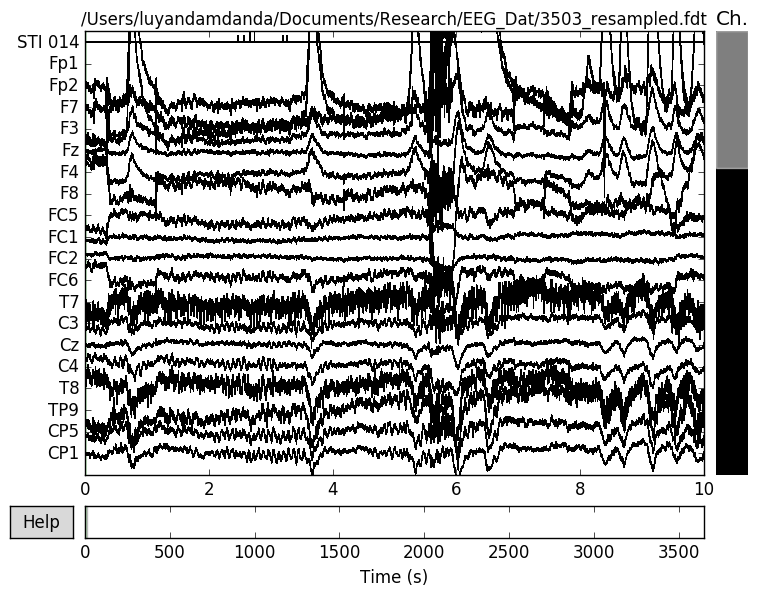

In [8]:
eeg_dat.plot()

In [9]:
# identifying all the events and IDs
mne.find_events(eeg_dat)

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]


array([[   1234,       0,       3],
       [   1282,       0,       3],
       [   1334,       0,       5],
       ..., 
       [1809424,       0,      10],
       [1814345,       0,      10],
       [1816041,       0,    1002]])

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 9 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1003 missing from event_id will be ignored
event 1004 missing from event_id will be ignored


<ipython-input-10-455896c44353>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-455896c44353>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-455896c44353>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-455896c44353>:12: RuntimeWarning: event 9 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-455896c44353>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-455896c44353>:12: RuntimeWarning: event 1003 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-10-455896c44353>:12: RuntimeWarning: event 1004 missing from event_id will be ignored
  event_id=event_id)


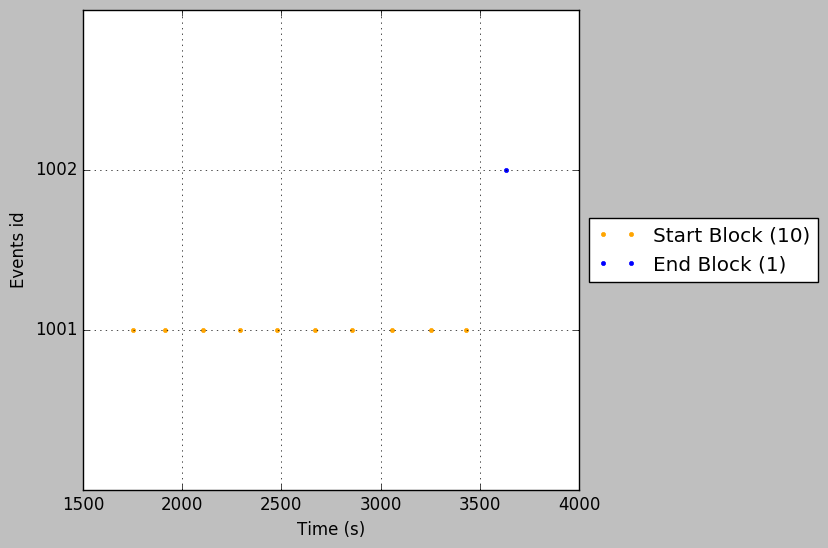

In [10]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Block': 1001, 'End Block': 1002,}
color = {1001:'orange', 1002:'blue'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [ ]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Events")

<h1> Woop woop </h1>
<h3> 11 matching events, this seems very promosing </h3>

In [ ]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Labelling Block':1003}
color = {1003:'red'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [ ]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Rest Events")

In [ ]:
epochs.plot()

# Marking bad channels
### Based on visualization.


In [11]:
eeg_dat.info['bads'] = ['TP9']

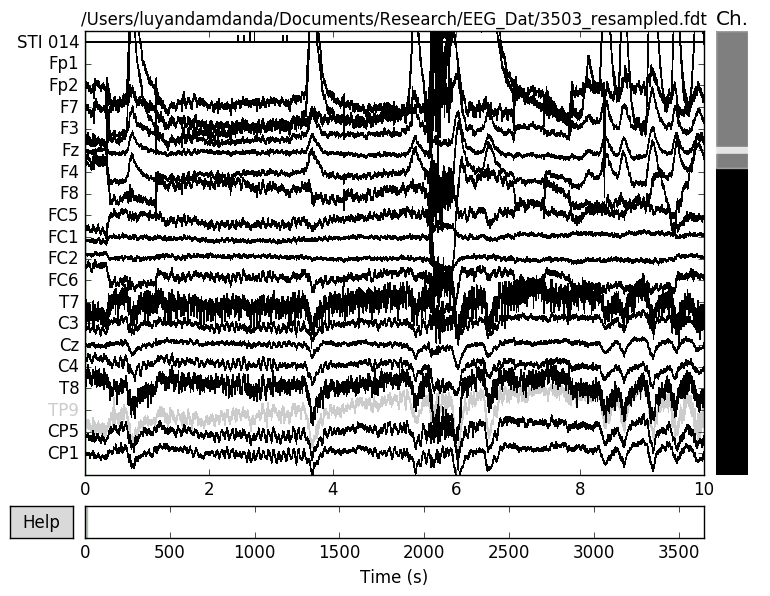

In [12]:
# plot with bads
eeg_dat.plot()

In [13]:
print('Bad channels: ', eeg_dat.info['bads'])

('Bad channels: ', ['TP9'])


In [14]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | TP9
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 65
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneTy

# Marking bad moments
### Identifying bad moments based on visualization

In [15]:
# Not to critical for this data

# Re-referencing to average

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 9 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1001 missing from event_id will be ignored
event 1002 missing from event_id will be ignored
event 1004 missing from event_id will be ignored


<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 9 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1001 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1002 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-16-258898793aa5>:12: RuntimeWarning: event 1004 missing from event_id will be ignored
  event_id=event_id)


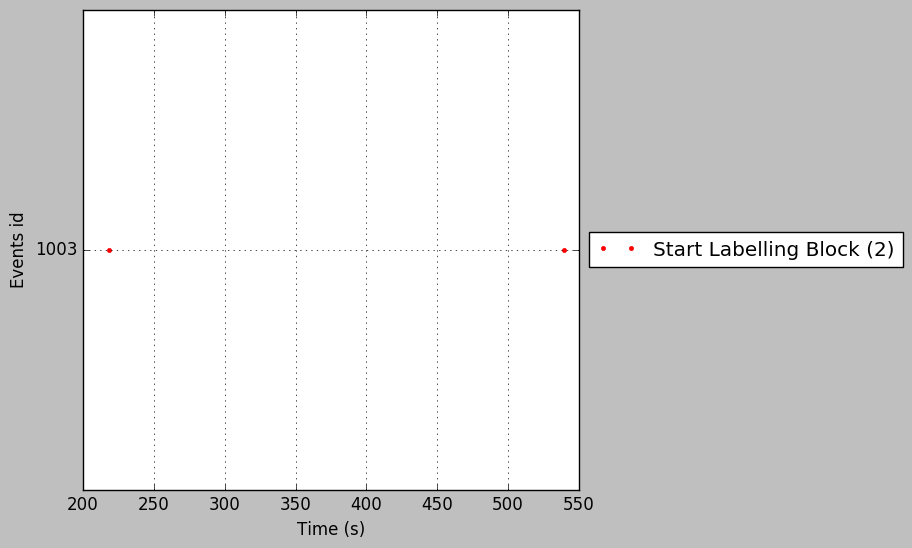

In [16]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Labelling Block':1003}
color = {1003:'red'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

In [17]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 125,
                    baseline = None, name = "Epochs created on Start and End Rest Events")

name is deprecated and will be removed in 0.15.
2 matching events found
0 projection items activated


<ipython-input-17-40f0dbcdb9cf>:2: RuntimeWarning: name is deprecated and will be removed in 0.15.
  baseline = None, name = "Epochs created on Start and End Rest Events")


In [18]:
event_id

{'Start Labelling Block': 1003}

Loading data for 2 events and 60001 original time points ...


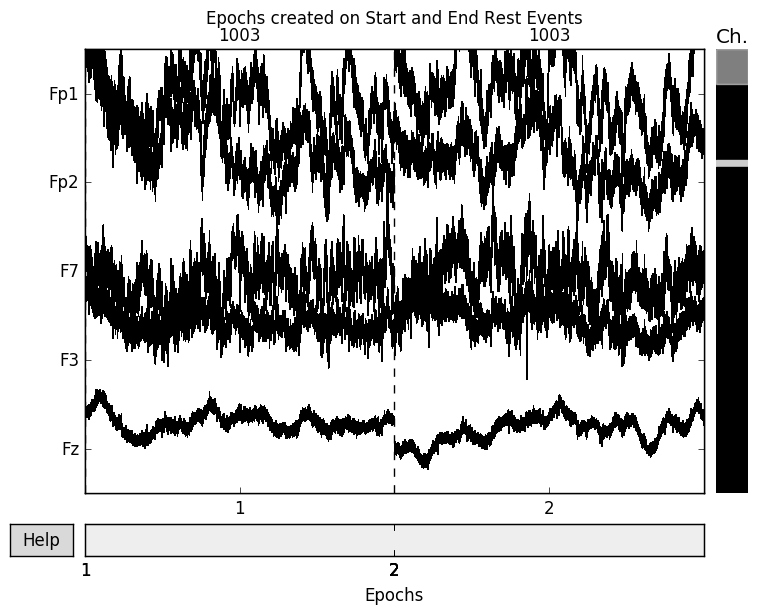

In [20]:
epochs.plot(n_channels=5)

In [21]:
epochs.drop_bad()

Loading data for 2 events and 60001 original time points ...


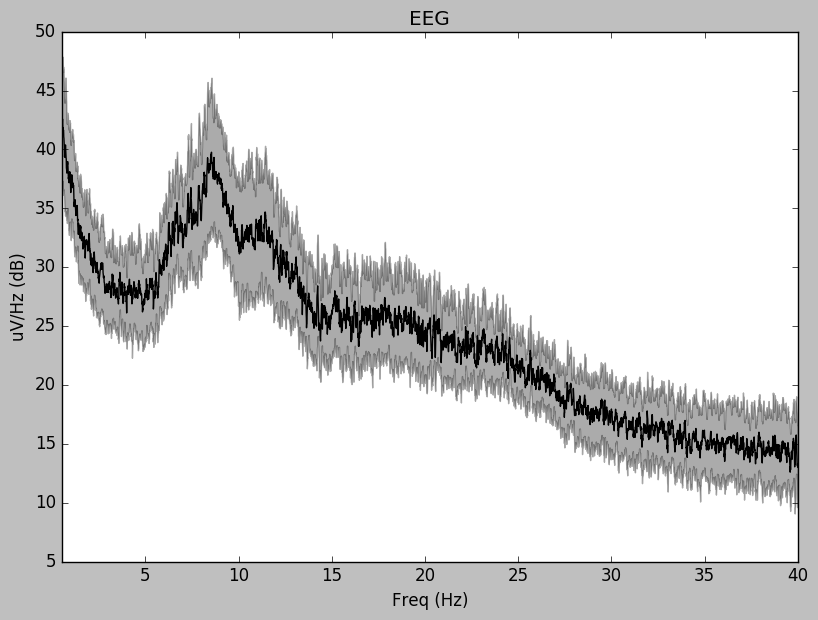

In [22]:
epochs.plot_psd(fmin = 0.5, fmax = 40)

In [81]:
# Calculate PSDs
psds, freqs = mne.time_frequency.psd_welch(epochs, fmin=3., fmax=40., n_fft=500)

# Average PSDs for each channel across each rest block
avg_psds = np.mean(psds, axis=0)

Loading data for 2 events and 60001 original time points ...
Effective window size : 1.000 (s)


In [82]:
avg_psds.shape

(63, 38)

In [83]:
psds.shape

(2, 63, 38)

In [84]:
# Get freq res of PSD
f_res = np.mean(np.diff(freqs))

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
freqs

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.])

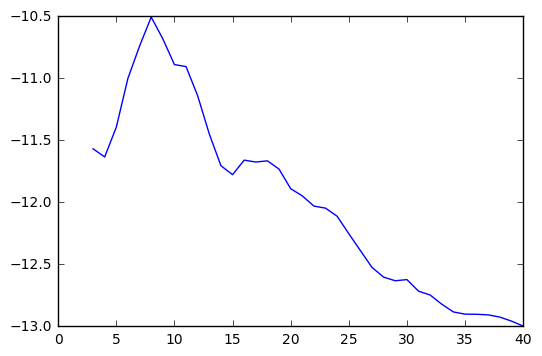

In [102]:
plt.plot(freqs, np.log10(psds[1, 30, :]))

# FOOFing Data

In [104]:
# Settings for FOOF
min_p = 0.2
freq_res = np.mean(np.diff(freqs))
foof = FOOF(freqs, res=freq_res, min_p=min_p)
#psd = np.reshape(avg_psds[50, :], [len(freqs), 1])
psd = np.reshape(psds[0, 10, :], [len(freqs), 1])
foof.fit(psd)

In [105]:
# Extract foof fit data
foof_dat = (foof.chi_, foof.centers_, foof.powers_, foof.stdevs_)
sl_foof = -foof.chi_

In [106]:
# Check FOOF outputs
#  foof_dat is [slope_val, [center frequencies], [oscillation powers], [oscillation bandwidths]]
foof_dat

(2.0656808868594734,
 array([ 15.81246915,  16.8119047 ]),
 array([  5.88106441e-13,   6.91639897e-13]),
 array([ 6.22782596,  6.23570071]))

In [128]:
type(foof_dat)

tuple

In [129]:
foofresults = []
for i in range (psds.shape[1]):
    psd = np.reshape(psds[0, i, :], [len(freqs), 1])
    foof.fit(psd)
    # Extract foof fit data
    foof_dat = (foof.chi_, foof.centers_, foof.powers_, foof.stdevs_)
    foofresults.append(foof_dat)

In [130]:
print(foofresults)

[(1.27694283990368, array([  8.25524791,  11.0135795 ,  21.14490166]), array([  4.90061253e-12,   2.83462285e-12,   6.28817779e-13]), array([ 0.97239511,  1.48633765,  2.46504927])), (1.2664333531986462, array([ 9.52582911]), array([  2.57146938e-12]), array([ 1.84576506])), (1.5353902196219666, array([  8.40132651,  11.3123779 ,  20.76299663]), array([  7.60833382e-12,   3.83162859e-12,   6.58406088e-13]), array([ 1.01779269,  1.65472725,  2.72429342])), (2.303277761569742, array([  9.6066006 ,  23.61869846]), array([  1.74679747e-12,   3.15803630e-13]), array([ 1.01680122,  1.36756476])), (1.5438720164940025, array([  9.30353594,  23.66748404]), array([  6.65435816e-13,   9.50992497e-14]), array([ 1.39566433,  1.41250556])), (1.9120857247583716, array([ 19.40365417,  24.12275912]), array([  3.22139520e-13,   2.64885003e-13]), array([ 1.3247719 ,  1.57842169])), (1.6889803007312283, array([  9.63549336,  19.30962154]), array([  3.48517740e-12,   9.94876951e-13]), array([ 1.85419005,  

Slope should be less than 2

In [145]:
print(foofresults[1])

(1.2664333531986462, array([ 9.52582911]), array([  2.57146938e-12]), array([ 1.84576506]))


In [152]:
f_res = foofresults[0]

In [153]:
f_res[

(1.27694283990368,
 array([  8.25524791,  11.0135795 ,  21.14490166]),
 array([  4.90061253e-12,   2.83462285e-12,   6.28817779e-13]),
 array([ 0.97239511,  1.48633765,  2.46504927]))

In [172]:
f_res

(4.0890826667785003,
 array([ 10.92115733,  19.3400783 ,  22.02946846]),
 array([  1.91818127e-11,   2.26985813e-12,   9.97061537e-13]),
 array([ 0.98622706,  0.96573212,  1.54860868]))

In [184]:
print(f_res[1][osc])

19.3400782961


In [210]:
alpha = np.zeros(len(foofresults))
theta = np.zeros(len(foofresults))
beta = np.zeros(len(foofresults))

# Looping through channels
#for i in range len(foofresults):
for cur_chan, f_res in enumerate(foofresults):
    #print(cur_chan)
    
    # Check how many oscillations found on current chan
    n_oscs = len(f_res[1])
    
    # Temporary power vaariables (t - temp)
    talphapower = 0;
    tthetapower = 0;
    tbetapower = 0;
    
    # Places frequencies in categories
    #for osc in range(n_oscs):
    for ind, cen in enumerate(f_res[1]):
        
        # within theta range    
        if 3 <= cen < 7:
            if not theta[cur_chan]:
                theta[cur_chan] = cen
        
        # within alpha range    
        if 7 <= cen < 14:
            if not alpha[cur_chan]:
                alpha[cur_chan] = cen
                talphapower = f_res [2][ind]
            else:
                if f_res[2][ind] > talphapower:
                    alpha[cur_chan] = cen
                    talphapower = f_res[2][ind]
                     
        # within beta range    
        if 14 <= cen <= 30:
            if not beta[cur_chan]:
                beta[cur_chan] = cen
                tbetapower = f_res[2][ind]
            else:
                if f_res[2][ind] > tbetapower:
                    beta[cur_chan] = cen
                    tbetapower = f_res[2][ind]
            
        #if  theta[foofresults.index(f_res)] == 0 and f_res[2][osc]>tthetapower:
        #    theta[foofresults.index(f_res)] = f_res[1][osc]
        #    tthetapower = f_res[2][osc]
        # within alpha range
        #if 7 <= f_res[1][osc] < 14:
        #    if  alpha[foofresults.index(f_res)] == 0 and f_res[2][osc]>talphapower:
        #        alpha[foofresults.index(f_res)] = f_res[1][osc]
        #        talphapower = f_res[2][osc]        
        # within beta range
        #if 14 <= f_res[1][osc] <= 30:
        #    if  beta[foofresults.index(f_res)] == 0 and f_res[2][osc]>tbetapower:
        #        beta[foofresults.index(f_res)] = f_res[1][osc]
        #        tbetapower = f_res[2][osc]

In [212]:
theta

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

## Checking ranges

In [ ]:
event_id = {'Start Labelling Block':1003, 'End Labelling Block':1004}
baseline = None  # means from the first instant to t = 0
reject = dict( eeg = 0.000121364317584) #used average range of channels

picks_eeg = mne.pick_types(eeg_dat.info, meg=False, eeg=True, eog=True,
                           stim=False, exclude='bads')

epochs = mne.Epochs(eeg_dat, events, event_id, tmin, tmax, proj=True,
                    picks=picks_eeg, baseline=baseline, reject = reject,
                    reject_by_annotation=True, add_eeg_ref=False) ;

events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events

color = {1003:'red', 1004:'green'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id) 